In [4]:
%matplotlib inline
from pylab import *

In [5]:
from deficit_defs import *

_debug = False
if _debug:
    print("Debugging")

In [9]:
base='sims/2023-01-13'

weak_i=0
strong_i=1

In [7]:
sfname='sims/2023-01-13/continuous fix 25 neurons noise 1.0.asdf'
R=Results(sfname)



sims/2023-01-13/continuous fix 25 neurons noise 1.0.asdf


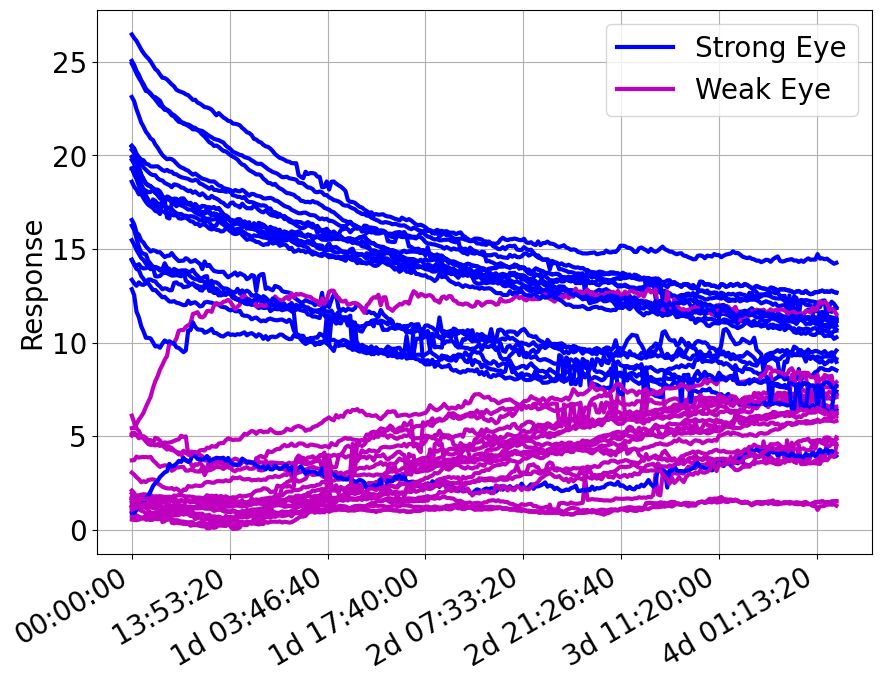

In [11]:
plot(R.t,R.y[:,0,strong_i],'b',label='Strong Eye')
plot(R.t,R.y[:,0,weak_i],'m',label='Weak Eye')

for n in range(20):
    plot(R.t,R.y[:,n,0],'m')
    plot(R.t,R.y[:,n,1],'b')
    
    
ylabel('Response')
legend()
print(sfname)
reformat_time_axis()    

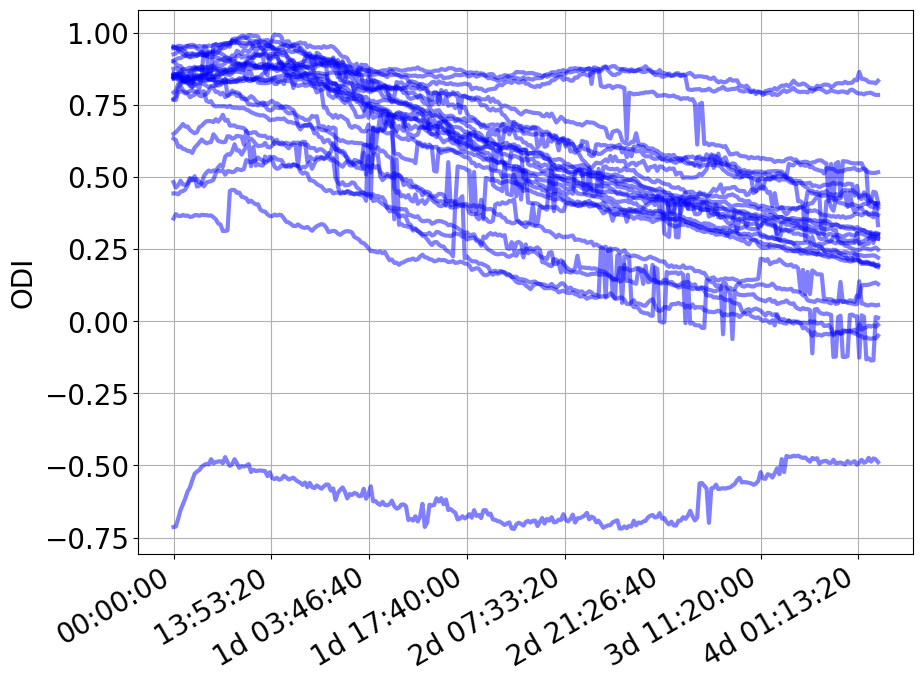

In [13]:
plot(R.t,R.ODI,'b',alpha=0.5);

ylabel('ODI')
reformat_time_axis()    

In [19]:
number_of_neurons=25
S=Storage()

noise_mat=linspace(0,1,11)

for n,noise in tqdm(enumerate(noise_mat)):
    sfname=base+f'/continuous fix {number_of_neurons} neurons noise {noise:.1f}.asdf'
    R=Results(sfname)
    idx1,idx2=R.sequence_index[0]
    t=R.t/day
    recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  
    
    S+=noise,recovery_rate_μ,recovery_rate_σ

0it [00:00, ?it/s]

In [20]:
noise,recovery_rate_μ,recovery_rate_σ=S.arrays()

Text(0.5, 1.0, 'Glasses Fix')

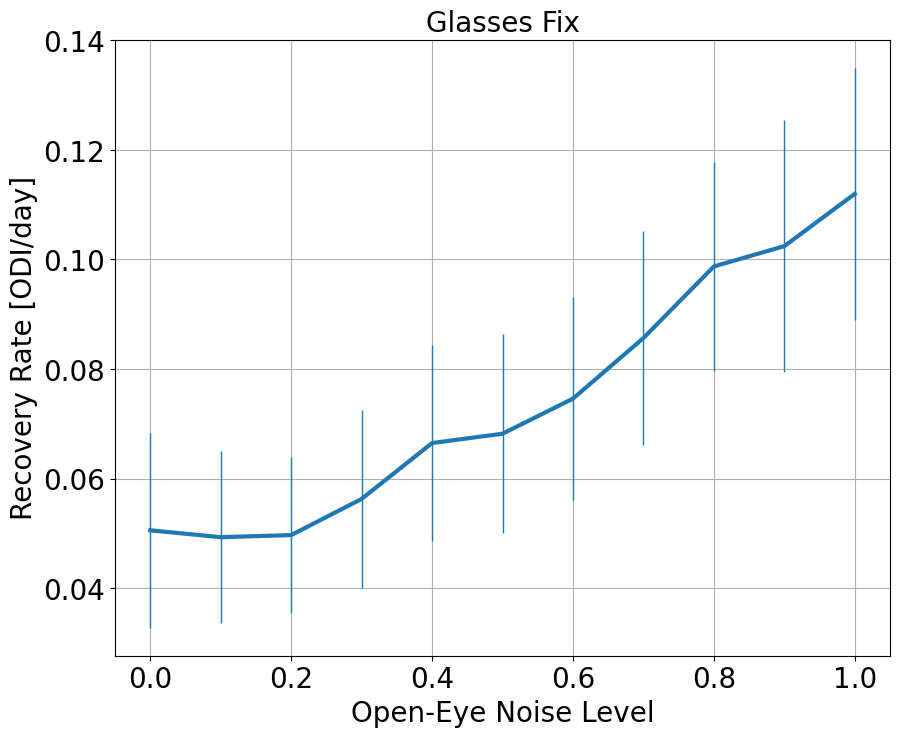

In [21]:
errorbar(noise,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1) # positive = recovery
ylabel('Recovery Rate [ODI/day]')
xlabel('Open-Eye Noise Level')
title('Glasses Fix')

In [22]:
closed_eye_noise_mat=linspace(0,1,21)

number_of_neurons=25
S=Storage()

for n,noise in tqdm(enumerate(closed_eye_noise_mat)):
    sfname=base+f'/continuous patch {number_of_neurons} neurons noise {noise:.1f}.asdf'

    R=Results(sfname)

    idx1,idx2=R.sequence_index[0]
    t=R.t/day
    recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  
    
    S+=noise,recovery_rate_μ,recovery_rate_σ    
    
    
noise,recovery_rate_μ,recovery_rate_σ=S.arrays()    

0it [00:00, ?it/s]

Text(0.5, 1.0, 'Patch Treatment')

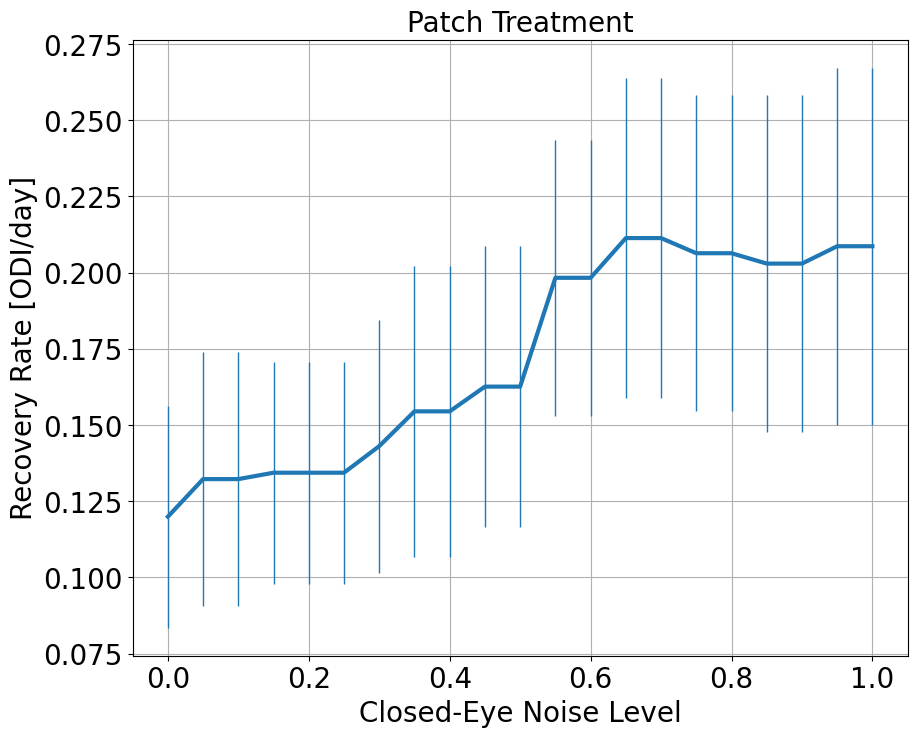

In [23]:
errorbar(noise,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1) # positive = recovery
ylabel('Recovery Rate [ODI/day]')
xlabel('Closed-Eye Noise Level')
title('Patch Treatment')

In [24]:
patch_result=noise,recovery_rate_μ,recovery_rate_σ

In [25]:
atropine_blur_mat=linspace(0,6,21)
closed_eye_noise_mat=linspace(0,1,11)

S=Storage()

count=0
    
for n,noise in tqdm(enumerate(closed_eye_noise_mat)):
    for b,blur in enumerate(atropine_blur_mat):
        sfname=base+f'/continuous atropine {number_of_neurons} neurons noise {noise:.1f} blur {blur:0.1f}.asdf'

        R=Results(sfname)


        idx1,idx2=R.sequence_index[0]
        t=R.t/day
        recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  

        S+=noise,blur,recovery_rate_μ,recovery_rate_σ    

        count+=1

    
noise,blur,recovery_rate_μ,recovery_rate_σ=S.arrays()        


0it [00:00, ?it/s]

In [26]:
noise_N=len(closed_eye_noise_mat)
blur_N=len(atropine_blur_mat)

noise=noise.reshape(noise_N,blur_N)
noise,blur,recovery_rate_μ,recovery_rate_σ=[_.reshape(noise_N,blur_N) for _ in (noise,blur,recovery_rate_μ,recovery_rate_σ)]

atropine_result=noise,blur,recovery_rate_μ,recovery_rate_σ

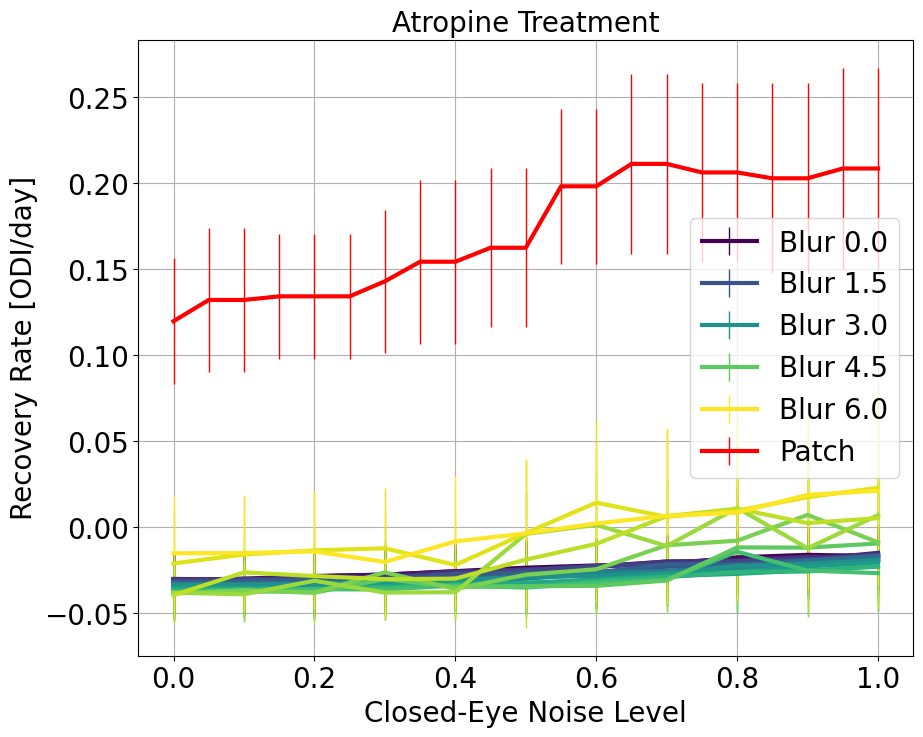

In [27]:
import cycler

n = 21
color = cm.viridis(np.linspace(0, 1,n))
#mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)



noise,blur,recovery_rate_μ,recovery_rate_σ=atropine_result

for b in range(blur_N):
    
    if blur[0,b] in [0,1.5,3,4.5,6]:
        errorbar(noise[:,b],-recovery_rate_μ[:,b],yerr=2*recovery_rate_σ[:,b],elinewidth=1,
                 label=f'Blur {blur[0,b]}',color=color[b]) # positive = recovery
    else:
        errorbar(noise[:,b],-recovery_rate_μ[:,b],yerr=2*recovery_rate_σ[:,b],elinewidth=1,
                 color=color[b]) # positive = recovery
        
        
noise,recovery_rate_μ,recovery_rate_σ=patch_result        
errorbar(noise,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,color='r',label='Patch') # positive = recovery
        
        
ylabel('Recovery Rate [ODI/day]')
xlabel('Closed-Eye Noise Level')
title('Atropine Treatment')
    
legend()

In [28]:
contrast_mat=linspace(0,1,11)
mask_mat=array([0,1])
f_mat=array([10,30,50,70,90])

S=Storage()

for c,contrast in enumerate(contrast_mat):
    sfname=base+f'/continuous contrast {number_of_neurons} neurons contrast {contrast:.1f}.asdf'

    R=Results(sfname)

    idx1,idx2=R.sequence_index[0]
    t=R.t/day
    recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  
    
    S+=contrast,recovery_rate_μ,recovery_rate_σ    
    
    
contrast,recovery_rate_μ,recovery_rate_σ=S.arrays()

contrast_result=contrast,recovery_rate_μ,recovery_rate_σ

Text(0.5, 1.0, 'Contrast Only Treatment')

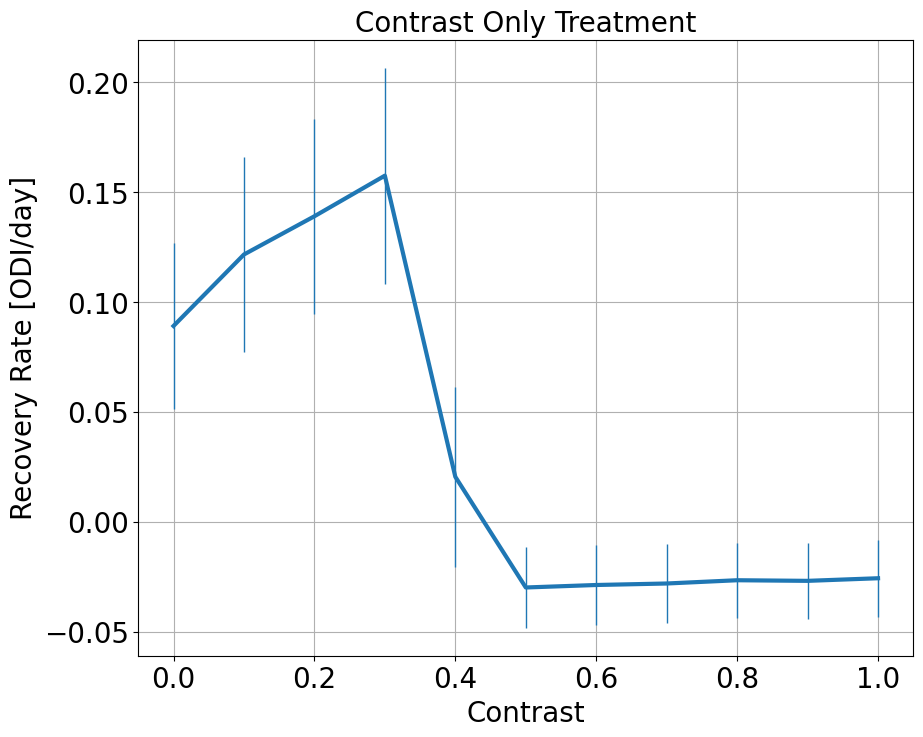

In [29]:
errorbar(contrast,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1) # positive = recovery
ylabel('Recovery Rate [ODI/day]')
xlabel('Contrast')
title('Contrast Only Treatment')

In [30]:
n = 5
color = cm.viridis(np.linspace(0, 1,n))
#mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

S=Storage()
for fi,f in enumerate(f_mat):
    for c,contrast in enumerate(contrast_mat):
        sfname=base+f'/continuous contrast {number_of_neurons} neurons contrast {contrast:.1f} mask f {f}.asdf'


        R=Results(sfname)

        idx1,idx2=R.sequence_index[0]
        t=R.t/day
        recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  

        S+=f,contrast,recovery_rate_μ,recovery_rate_σ    

        count+=1

    
f,contrast,recovery_rate_μ,recovery_rate_σ=S.arrays()        


In [31]:
f_N=len(f_mat)
contrast_N=len(contrast_mat)


f,contrast,recovery_rate_μ,recovery_rate_σ=[_.reshape(f_N,contrast_N) for _ in (f,contrast,recovery_rate_μ,recovery_rate_σ)]
mask_result=f,contrast,recovery_rate_μ,recovery_rate_σ

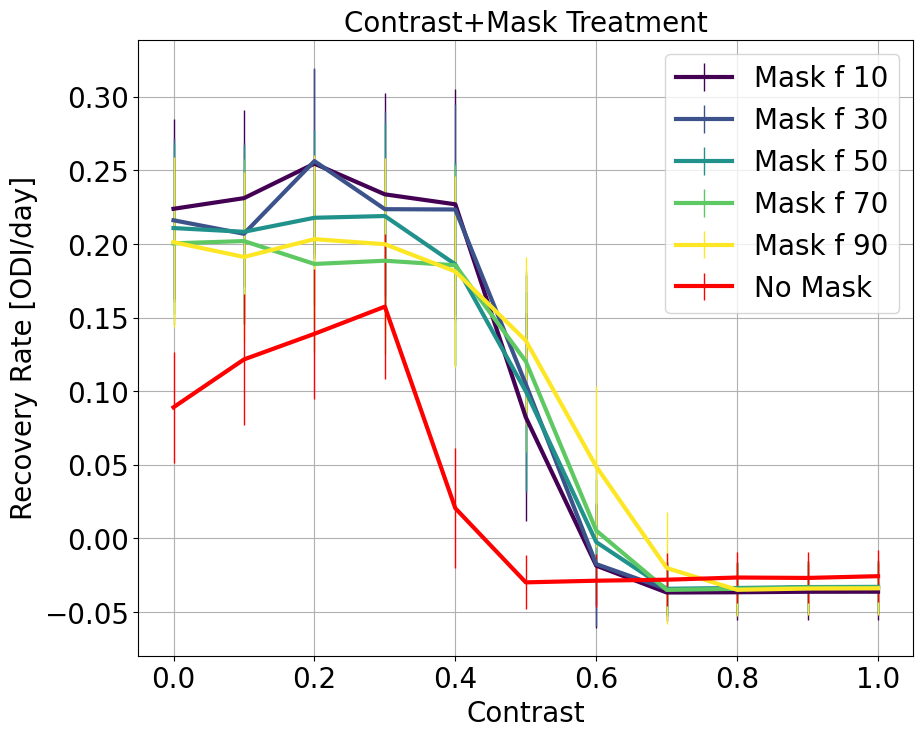

In [32]:
import cycler

n = len(f_mat)
color = cm.viridis(np.linspace(0, 1,n))
#mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

f,contrast,recovery_rate_μ,recovery_rate_σ=mask_result
for fi in range(f_N):
    
    errorbar(contrast[fi,:],-recovery_rate_μ[fi,:],yerr=2*recovery_rate_σ[fi,:],elinewidth=1,
             label=f'Mask f {f[fi,0]}',color=color[fi]) # positive = recovery

    
    
contrast,recovery_rate_μ,recovery_rate_σ=contrast_result
errorbar(contrast,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,color='r',label='No Mask') # positive = recovery

    
ylabel('Recovery Rate [ODI/day]')
xlabel('Contrast')
title('Contrast+Mask Treatment')
    
legend()